In [40]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt

# **MNIST**

In [3]:
mnist = fetch_openml('mnist_784', version=1, as_frame = False)

In [32]:
mnist["data"]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [36]:
y_test.shape, y_train.shape

((10000,), (60000,))

## **KNN**

In [41]:
from sklearn.neighbors import KNeighborsClassifier

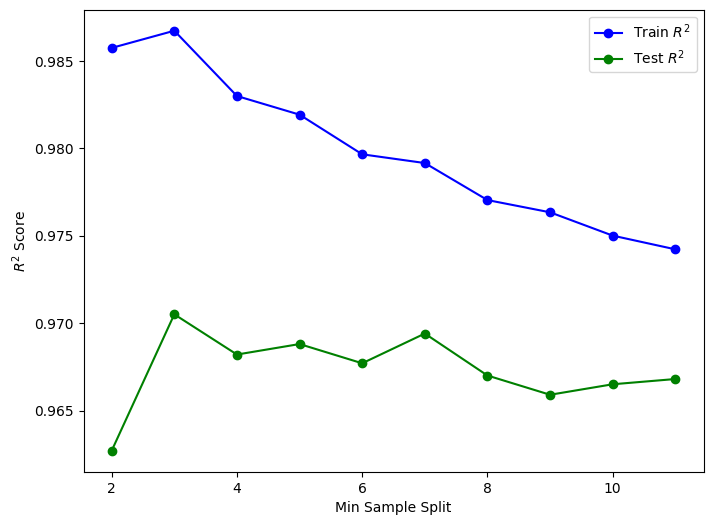

In [41]:
n_n = range(2, 12)
train_scores = []
test_scores = []

for n in n_n:
    KNN = KNeighborsClassifier(n_neighbors= n)
    KNN.fit(X_train, y_train)
    train_scores.append(KNN.score(X_train, y_train))
    test_scores.append(KNN.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(n_n, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(n_n, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('$R^2$ Score')
plt.legend()
plt.show()

### **Metric = Cosine**

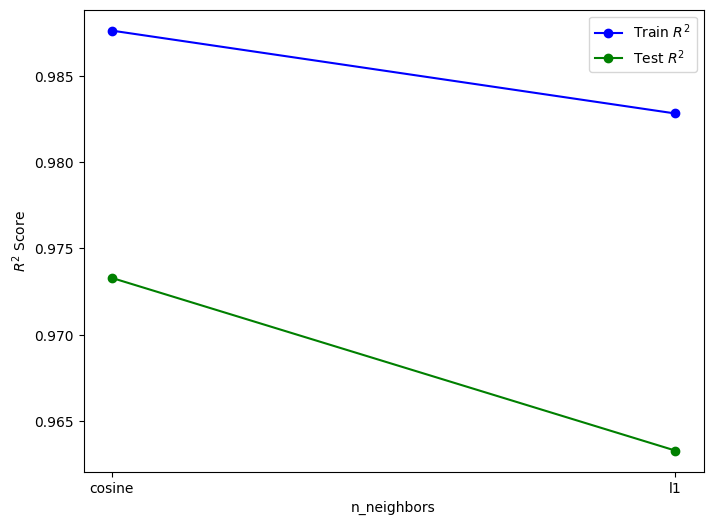

In [18]:
p = ['cosine', 'l1']
train_scores = []
test_scores = []

for algorith in p:
    KNN = KNeighborsClassifier(n_neighbors= 3, metric= algorith)
    KNN.fit(X_train, y_train)
    train_scores.append(KNN.score(X_train, y_train))
    test_scores.append(KNN.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(p, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(p, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('$R^2$ Score')
plt.legend()
plt.show()


In [10]:
KNN_Model = KNeighborsClassifier(n_neighbors=3,  metric= 'cosine' )
KNN_Model.fit(X_train, y_train)
y_pred = KNN_Model.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

0.9733

In [14]:
cross_val_score(KNN_Model, X_train, y_train, cv=5, scoring="accuracy")

array([0.97566667, 0.9735    , 0.97408333, 0.97341667, 0.97383333])

### **Metric = L1**

In [15]:
KNN_Model = KNeighborsClassifier(n_neighbors=3,  metric= 'l1' )
KNN_Model.fit(X_train, y_train)
y_pred = KNN_Model.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

0.9633

In [17]:
cross_val_score(KNN_Model, X_train, y_train, cv=5, scoring="accuracy")

array([0.96475   , 0.96425   , 0.96216667, 0.9615    , 0.96316667])

### **Metric = L2**

In [7]:
KNN_Model = KNeighborsClassifier(n_neighbors=3,  metric= 'l2' )
KNN_Model.fit(X_train, y_train)
y_pred = KNN_Model.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.9705

In [9]:
cross_val_score(KNN_Model, X_train, y_train, cv=5, scoring="accuracy")

array([0.97175   , 0.97066667, 0.96891667, 0.96858333, 0.97041667])

## **Ramdom Foreest**

In [7]:
from sklearn.ensemble import RandomForestClassifier

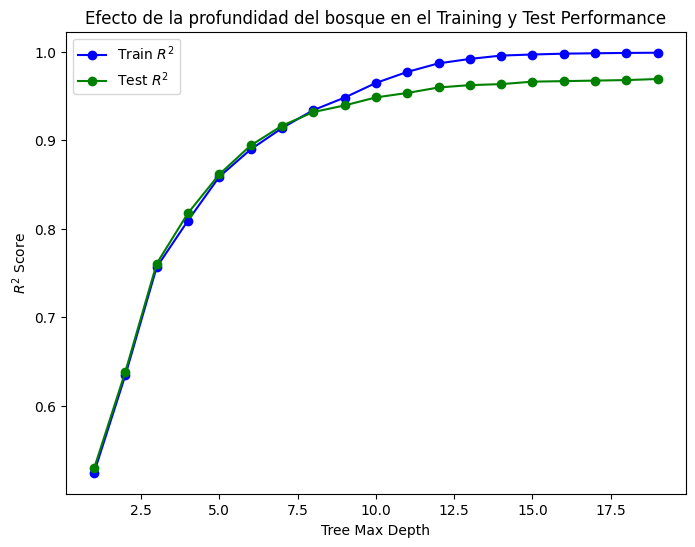

In [22]:
max_depths = range(1, 20)
train_scores = []
test_scores = []

for max_depth in max_depths:
    tree_reg = RandomForestClassifier(max_depth=max_depth)
    tree_reg.fit(X_train, y_train)
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_depths, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(max_depths, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del bosque en el Training y Test Performance')
plt.legend()
plt.show()

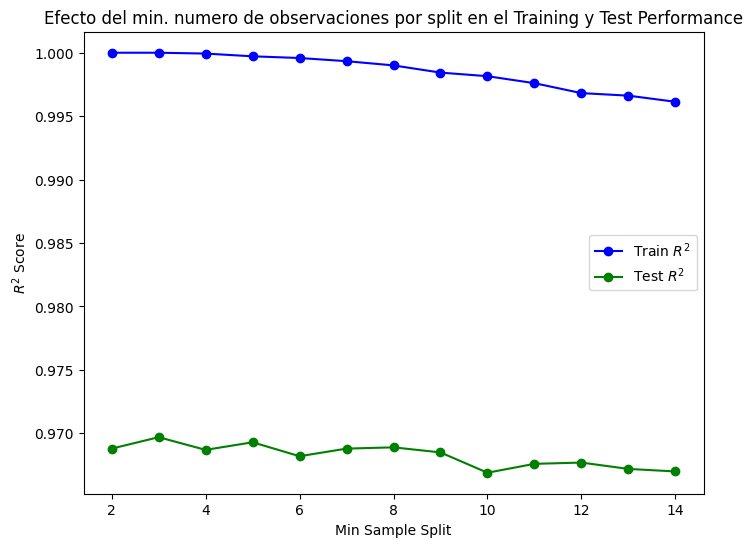

In [24]:
min_samples_splits = range(2, 15)
train_scores = []
test_scores = []

for min_samples_split in min_samples_splits:
    tree_reg = RandomForestClassifier(min_samples_split=min_samples_split)
    tree_reg.fit(X_train, y_train)
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(min_samples_splits, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(min_samples_splits, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Min Sample Split')
plt.ylabel('$R^2$ Score')
plt.title('Efecto del min. numero de observaciones por split en el Training y Test Performance')
plt.legend()
plt.show()

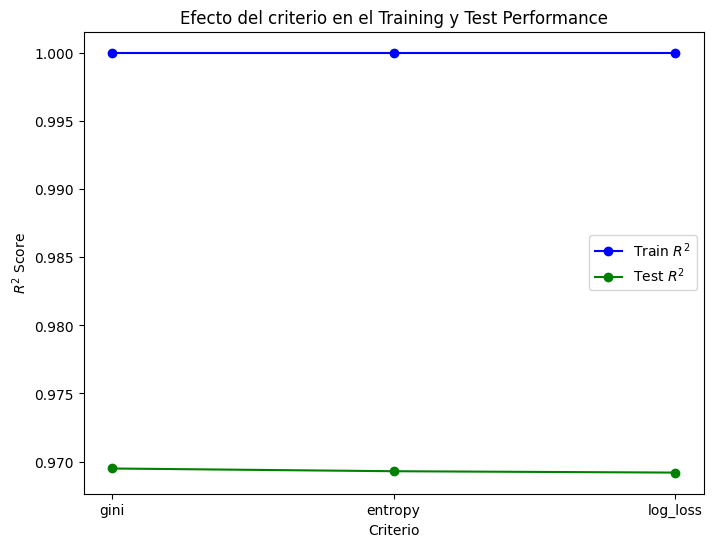

In [27]:
criterio = ['gini', 'entropy', 'log_loss']
train_scores = []
test_scores = []

for criterions in criterio:
    tree_reg = RandomForestClassifier(criterion=criterions)
    tree_reg.fit(X_train, y_train)
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(criterio, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(criterio, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Criterio')
plt.ylabel('$R^2$ Score')
plt.title('Efecto del criterio en el Training y Test Performance')
plt.legend()
plt.show()

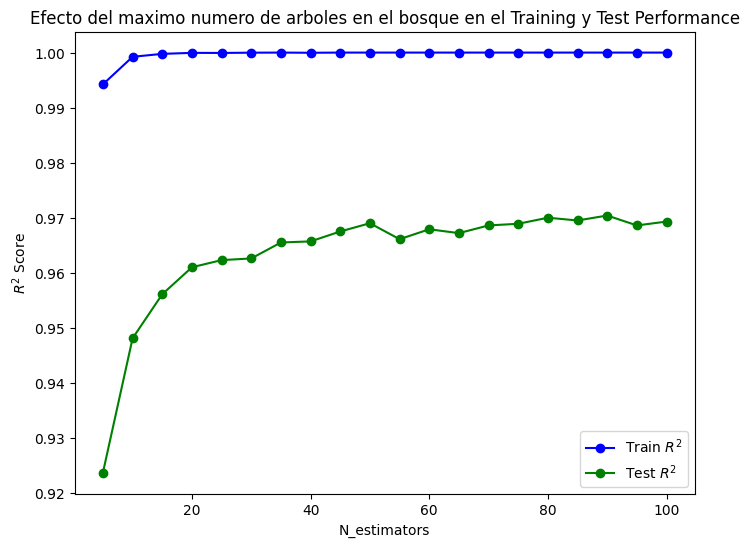

In [34]:
max_tree = range(5, 101, 5)
train_scores = []
test_scores = []

for max_trees in max_tree:
    tree_reg = RandomForestClassifier(n_estimators= max_trees)
    tree_reg.fit(X_train, y_train)
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_tree, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(max_tree, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('N_estimators')
plt.ylabel('$R^2$ Score')
plt.title('Efecto del maximo numero de arboles en el bosque en el Training y Test Performance')
plt.legend()
plt.show()

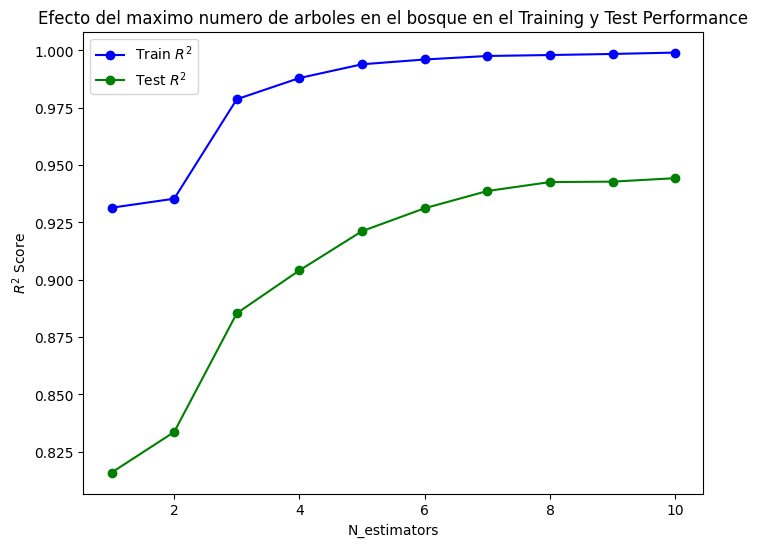

In [35]:
max_tree = range(1, 11)
train_scores = []
test_scores = []

for max_trees in max_tree:
    tree_reg = RandomForestClassifier(n_estimators= max_trees)
    tree_reg.fit(X_train, y_train)
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_tree, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(max_tree, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('N_estimators')
plt.ylabel('$R^2$ Score')
plt.title('Efecto del maximo numero de arboles en el bosque en el Training y Test Performance')
plt.legend()
plt.show()

### **Variant 1** 

In [11]:
RandomForest_Model = RandomForestClassifier(n_estimators=3,  min_samples_split= 10, max_depth = 11, criterion = 'gini' )
RandomForest_Model.fit(X_train, y_train)
y_pred = RandomForest_Model.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.8933

In [13]:
cross_val_score(RandomForest_Model, X_train, y_train, cv=5, scoring="accuracy")

array([0.88366667, 0.87783333, 0.87308333, 0.87266667, 0.88616667])

### **Variant 2** 

In [14]:
RandomForest_Model = RandomForestClassifier(n_estimators=5,  min_samples_split= 15, max_depth = 12, criterion = 'log_loss')
RandomForest_Model.fit(X_train, y_train)
y_pred = RandomForest_Model.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.9271

In [16]:
cross_val_score(RandomForest_Model, X_train, y_train, cv=5, scoring="accuracy")

array([0.921     , 0.91583333, 0.9175    , 0.916     , 0.92608333])

### **Variant 3** 

In [26]:
RandomForest_Model = RandomForestClassifier(n_estimators=20,  min_samples_split= 50, max_depth = 30, criterion = 'log_loss')
RandomForest_Model.fit(X_train, y_train)
y_pred = RandomForest_Model.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.9515

In [28]:
cross_val_score(RandomForest_Model, X_train, y_train, cv=5, scoring="accuracy")

array([0.9445    , 0.94291667, 0.94166667, 0.93883333, 0.9505    ])

# **Fashon MNIST**

In [43]:
import pandas as pd 
import numpy as np 

In [44]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [45]:
y_train = train_df.pop("label")
y_test = test_df.pop("label")
X_train = np.array(train_df)
X_test= np.array(test_df)

## **KNN**

### **Version 1**

In [46]:
KNN_Model = KNeighborsClassifier(n_neighbors=3,  metric= 'l1' )
KNN_Model.fit(X_train, y_train)
y_pred = KNN_Model.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred)

0.8664

In [48]:
cross_val_score(KNN_Model, X_train, y_train, cv=5, scoring="accuracy")

array([0.8605    , 0.85733333, 0.86033333, 0.85525   , 0.85708333])

### **Version 2**

In [49]:
KNN_Model = KNeighborsClassifier(n_neighbors=7,  metric= 'l2' )
KNN_Model.fit(X_train, y_train)
y_pred = KNN_Model.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred)

0.8558

In [51]:
cross_val_score(KNN_Model, X_train, y_train, cv=5, scoring="accuracy")

array([0.85416667, 0.85358333, 0.85483333, 0.8485    , 0.85333333])

### **Version 3**

In [52]:
KNN_Model = KNeighborsClassifier(n_neighbors=3,  metric= 'cosine' )
KNN_Model.fit(X_train, y_train)
y_pred = KNN_Model.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.8621

In [54]:
cross_val_score(KNN_Model, X_train, y_train, cv=5, scoring="accuracy")

array([0.86      , 0.86025   , 0.86208333, 0.85525   , 0.861     ])

## **RandomForest**

### **Version 1**

In [55]:
RandomForest_Model = RandomForestClassifier(n_estimators=3,  min_samples_split= 10, max_depth = 11, criterion = 'gini' )
RandomForest_Model.fit(X_train, y_train)
y_pred = RandomForest_Model.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.8276

In [57]:
cross_val_score(RandomForest_Model, X_train, y_train, cv=5, scoring="accuracy")

array([0.82891667, 0.82125   , 0.82583333, 0.82208333, 0.82708333])

### **Version 2**

In [58]:
RandomForest_Model = RandomForestClassifier(n_estimators=9,  min_samples_split= 5, max_depth = 15, criterion = 'log_loss' )
RandomForest_Model.fit(X_train, y_train)
y_pred = RandomForest_Model.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred)

0.8642

In [60]:
cross_val_score(RandomForest_Model, X_train, y_train, cv=5, scoring="accuracy")

array([0.86441667, 0.86058333, 0.86316667, 0.85716667, 0.86      ])

### **Version 3**

In [61]:
RandomForest_Model = RandomForestClassifier(n_estimators=30,  min_samples_split= 100, max_depth = 7, criterion = 'gini' )
RandomForest_Model.fit(X_train, y_train)
y_pred = RandomForest_Model.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred)

0.8093

In [63]:
cross_val_score(RandomForest_Model, X_train, y_train, cv=5, scoring="accuracy")

array([0.81408333, 0.80616667, 0.81683333, 0.8085    , 0.8105    ])